In [98]:
# Yale Quantum Institute Hackathon
# Date: June 2020
# Team: Quantum Hoppers
#
# Team Members:
# Paola
# Amy
# Nana
# Klaara
# Bruce

In [99]:
from qiskit import *

In [100]:
from qiskit.tools.visualization import plot_histogram

In [101]:
from qiskit.tools.monitor import job_monitor

In [102]:
%matplotlib inline

In [103]:
name = input("Enter Your Name:")

Enter Your Name:Amy


In [104]:
if name =="":
    name = "Marie"

In [105]:
# create binary version of name
ascii_name = bytes(name, "ascii")
#print(ascii_name, type(ascii_name))
ascii_name = ' '.join(["{0:b}".format(x) for x in ascii_name])
#print(type(ascii_name), ascii_name)

In [106]:
# QUANTUM CIRCUIT CREATION

In [107]:
# Create 7 circuits becuase each letter has 7 bits
my_quantum_circuit_quantity = 7
my_classical_circuit_quantity = 7

In [108]:
circuit = QuantumCircuit(my_quantum_circuit_quantity,my_classical_circuit_quantity)
#print("Created {} quantum circuits.".format(my_quantum_circuit_quantity))

In [109]:
letters_list = ascii_name.split()
print(letters_list)
# letters_list contains the binary representation of the person's name in a list
# So Marie is '1001101', '1100001', '1110010', '1101001', '1100101'

# take each letter and apply a gate to the quantum circuit based on the 0's and 1's that make up the letter  

for i in range(0, len(letters_list)):
    letters = letters_list[i]
    for j in range(0, len(letters)):
        if int(letters[j])== 1 and i == 0 :
            circuit.h(j)
        if int(letters[j])== 1 and i == 1 :
            circuit.id(j)
        ## if there are two 1's in a row, put a controlled not gate
        if j < len(letters)-1 and int(letters[j])== 1 and int(letters[j+1])== 1 and i == 2 :
            circuit.cx(j,j+1)
        ## if there are two 0's in a row, put a controlled not gate    
        if j < len(letters)-1 and int(letters[j])== 0 and int(letters[j+1])== 0 and i == 2 :
            circuit.cx(j,j+1)
        ## if there are two 1's in a row, put U2  
        if j < len(letters)-2 and int(letters[j])== 1 and int(letters[j+1])== 1 and i == 3 :
            circuit.u2(j,j+1,j+2)
        ## if there are two 0's in a row, put U2      
        if j < len(letters)-2 and int(letters[j])== 0 and int(letters[j+1])== 0 and i == 3 :
            circuit.u2(j,j+1,j+2)
        ## if there are two 1's in a row, put U3    
        if j < len(letters)-2 and int(letters[j])== 1 and int(letters[j+1])== 1 and i == 4 :
            circuit.u3(j,j+1,j+2, j+3)
        ## if there are two 1's in a row, put U3    
        if j < len(letters)-2 and int(letters[j])== 0 and int(letters[j+1])== 0 and i == 4 :
            circuit.u3(j,j+1,j+2, j+3)       
        if int(letters[j])== 1 and i == 5 :
            circuit.u1(j, j-1)
    circuit.barrier()

['1000001', '1101101', '1111001']


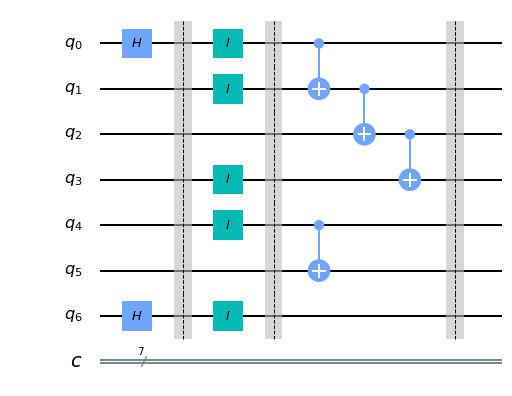

In [110]:
circuit.draw(output='mpl') 


In [111]:
# Preparing to send job to Quantum Computer

In [112]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-06-30 13:40:24,017: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [113]:
provider = IBMQ.get_provider('ibm-q')

In [114]:
#London is 5 qbits  - 8192 shots maximum.

In [115]:
#group = provider.get_backend('ibmq_london')

In [116]:
#Melbourne is 15 qbits  - 8192 shots maximum.

In [117]:
group = provider.get_backend('ibmq_16_melbourne')

In [118]:
simulator = Aer.get_backend('qasm_simulator')

In [119]:
job = execute(circuit, backend = simulator, shots = 1024)

In [120]:
# uncomment this line to run on real quantum computer
job = execute(circuit, backend = group, shots = 1024)

In [ ]:
# show job monitor
job_monitor(job)

Job Status: job is queued (12)    

In [ ]:
result = job.result()

In [ ]:
plot_histogram(result.get_counts(circuit))

In [ ]:
counts = result.get_counts()

In [ ]:
# get the answer that occurred with the most probability
import operator
answer = max(counts.items(), key=operator.itemgetter(1))[0]

In [ ]:
print("Thank you")

In [ ]:
# Create a plot, where 7 binary numbers are represented as a color boxes.
import matplotlib.pyplot as plt
import numpy
import math
import random

first_letter = letters_list[0]

ax = plt.gca()

for ii in range(0, 6):
    # Define state
    initial_state = int(first_letter[ii])
    #print(initial_state)
    p_one = numpy.random.rand(1)
    # print(p_one)
    p_zero = 1 - p_one
    # Define color according to the state
    color1 = initial_state
    color2 = p_one
    color3 = p_zero
    color = [color1, color2[0], color3[0]]
    #print("Color: ",color)
    # Define rectangle
    rectangle = plt.Rectangle((ii*1.1, 3), width=1, height=2, facecolor=color)
    # Add rectangle to plot
    ax.add_patch(rectangle)
# Create plot
plt.axis("scaled")
plt.axis("off")
plt.show()